### <span style = 'color:green'> Twitter Sentiment Analysis </span>
#### <span style = 'color:blue'> Performing sentiment analysis on Omnicron variant, data fetching directly from twitter</span>
**Sentiment analysis is the process of identifying feelings and emotions expressed in words, through ML or AI**

**Project Pipeline**

Various steps in completing project are

- **Import Necessary Dependencies**
- **Read and Load the Dataset**
- **Exploratory Data Analysis**
- **Data Visualization of Target Variables**
- **Data Preprocessing**
- **Splitting our data into Train and Test Subset**
- **Transforming Dataset using TF-IDF Vectorizer**
- **Function for Model Evaluation**
- **Model Building**
- **Conclusion**

- Here we have to get dataset directly fetched from twitter in realtime 

- performing realtime sentimental analysis on realtime data collecting from twitter
- objective: perform sentiment analysis on realtime data collected from twitter 

                      

           

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder,LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import LancasterStemmer
from bs4 import BeautifulSoup
#import spacy
import re,unicodedata,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob,Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import re

In [3]:
pd.set_option('float_format', '{:f}'.format)

In [4]:
df = pd.read_csv('Twitter_Omicron_data_1_1_1.csv')

In [5]:
df.head()

,tweets,likes,time,retweet_count
0,6 big questions about new Omicron-targeting bo...,0,2023-03-09 18:24:06,0
1,I'm confused https://t.co/NyfgdYUYAT,0,2023-03-09 18:23:43,0
2,Long COVID less likely after Omicron than afte...,0,2023-03-09 18:22:43,0
3,The finding don't tally with the high numbers ...,0,2023-03-09 18:21:45,0
4,A conference abstract from the European Congre...,1,2023-03-09 18:21:45,1


In [6]:
df.shape

(6998, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6998 entries, 0 to 6997
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweets         6998 non-null   object
 1   likes          6998 non-null   int64 
 2   time           6998 non-null   object
 3   retweet_count  6998 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 218.8+ KB


In [8]:
df['tweets'][:10].tolist()

['6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn',
 "I'm confused https://t.co/NyfgdYUYAT",
 'Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https://t.co/v4u9QBo8hS',
 "The finding don't tally with the high numbers we see in @ONS bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle covering this report from @TIME \n\nhttps://t.co/HRkF6ApGaU",
 'A conference abstract from the European Congress of Clinical Microbiology &amp; Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExpert comments here including from @Daltmann10 \n\nhttps://t.co/rw17Sf2uqd',
 'FGS @UKHSA pauses ONS C-19 Infection Survey 4 many months as govt decides whether to continue funding it. Scientists warn that the UK will be left “flying blind” without the survey, particularly if a

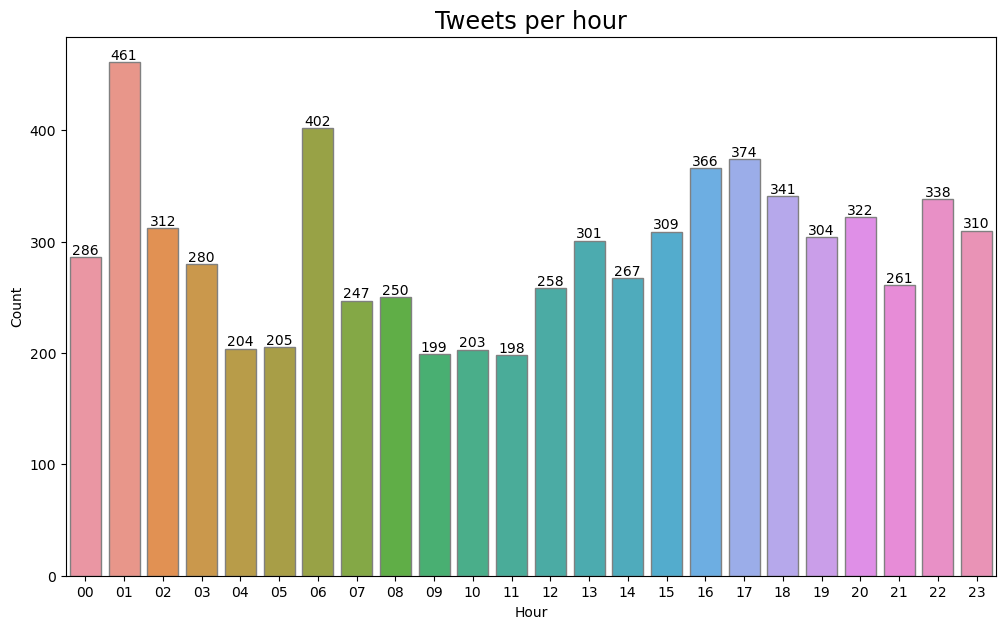

In [9]:
# change to date time format
df['time']=pd.to_datetime(df['time'])

# tweets per hour
tweets_per_hr = df['time'].dt.strftime('%H').value_counts().sort_index().to_frame(name='Count')
tweets_per_hr['Hour']=tweets_per_hr.index

# plot
plt.figure(figsize=(12,7))
ax=sns.barplot(x='Hour', y='Count',data=tweets_per_hr, edgecolor='grey')
ax.bar_label(ax.containers[0])
plt.title('Tweets per hour', size='xx-large')
plt.show()

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivangi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
tokenizer = ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')

In [12]:
pd.options.display.max_colwidth = 200

In [13]:
data=df[['tweets','retweet_count']]

In [14]:
data.head()

,tweets,retweet_count
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0
1,I'm confused https://t.co/NyfgdYUYAT,0
2,"Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https://t.co/v4u9QBo8hS",0
3,The finding don't tally with the high numbers we see in @ONS bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle coverin...,0
4,A conference abstract from the European Congress of Clinical Microbiology &amp; Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExper...,1


In [15]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shivangi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Shivangi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivangi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shivangi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<b>Perform Stemming or Lemmatization, comment on the different outputs.<br>
Removing Outliers and Noise reduction</b>

In [16]:
stemmer = PorterStemmer()
leammatizer = WordNetLemmatizer()

In [17]:
def remove_html(text):
    return re.sub(r':.*$', ":",text) #Remove urls

def remove_tags(text):
  return re.sub('@[A-Za-z0-9-]+([A-Z|a-z])','',text)

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser") #Remove https words
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)   #Remove special characters

def denoise_text(text):
    text = remove_html(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_tags(text)
    return text  #Function call
  
data['review'] = data['tweets'].apply(denoise_text)
data.head(5)

,tweets,retweet_count,review
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https:
1,I'm confused https://t.co/NyfgdYUYAT,0,I'm confused https:
2,"Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https://t.co/v4u9QBo8hS",0,"Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https:"
3,The finding don't tally with the high numbers we see in @ONS bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle coverin...,0,The finding don't tally with the high numbers we see in bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle covering th...
4,A conference abstract from the European Congress of Clinical Microbiology &amp; Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExper...,1,A conference abstract from the European Congress of Clinical Microbiology & Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExpert co...


<b> Removing Special Characters </b>

In [24]:
def remove_special_characters(text,remove_digits=True):
    url_pattern = r'https?://\S+|www\.\S+'
    # Replace URLs with an empty string
    text = re.sub(url_pattern, '', text)
    
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'
    # Replace special characters (and digits if remove_digits is True) with an empty string
    if remove_digits:
        text = re.sub(pattern, '', text)
    else:
        text = re.sub(pattern, '', text)
    return text

data['review'] = data['review'].apply(remove_special_characters)
data.head(2)

,tweets,retweet_count,review
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https


Stemming

In [25]:
def simpleStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

data['stem_review'] = data['review'].apply(simpleStemmer)
data.head()

,tweets,retweet_count,review,stem_review
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http
2,"Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https://t.co/v4u9QBo8hS",0,Long COVID less likely after Omicron than after original virus Swiss LabPulse https,long covid less like after omicron than after origin viru swiss labpuls http
3,The finding don't tally with the high numbers we see in @ONS bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle coverin...,0,The finding dont tally with the high numbers we see in bulletins \n\nMost research still reports on preOmicron infections so we need to wait for a broader set of studies\n\nArticle covering this ...,the find dont talli with the high number we see in bulletin most research still report on preomicron infect so we need to wait for a broader set of studi articl cover thi report from http
4,A conference abstract from the European Congress of Clinical Microbiology &amp; Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExper...,1,A conference abstract from the European Congress of Clinical Microbiology Infectious Diseases suggested that Omicron infection causes much less LongCovid than wildtype SARSCoV2 \n\nExpert comment...,a confer abstract from the european congress of clinic microbiolog infecti diseas suggest that omicron infect caus much less longcovid than wildtyp sarscov2 expert comment here includ from 10 http


Lemmatization

In [26]:
def simpleLemmatization(text):
    lemma = nltk.stem.WordNetLemmatizer()
    text = ' '.join([lemma.lemmatize(word) for word in text.split()])
    return text

data['lemmatize_review'] = data['review'].apply(simpleLemmatization)
data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http


In [27]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text,is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

data['final_review'] = data['review'].apply(remove_stopwords)
data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https


Normalised Train and Test reviews

In [28]:
data.shape

(6998, 6)

In [29]:
norm_train_reviews = data.final_review[:5000]
print(norm_train_reviews[0])

norm_test_reviews=data.final_review[5001:]
print(norm_test_reviews[6000])

6 big questions new Omicrontargeting boosters Boosting Target targeting boost https
10 5 last one Dec omicron one reactions shots Ireceived would skipped 4th thought omicron would really delayed


Bag Of Words

In [30]:
cv = CountVectorizer(min_df=0.0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews = cv.fit_transform(norm_train_reviews)
cv_test_reviews = cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (5000, 114455)
BOW_cv_test: (1997, 114455)


In [31]:
cv_train_reviews[1]

<1x114455 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [32]:
cv_train_reviews[1].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

<b> Term Frequency and Inverse Document Frequency<b> 

In [33]:
tv = TfidfVectorizer(min_df=0.0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews = tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)


print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (5000, 114455)
Tfidf_test: (1997, 114455)


<b> Polarity and Subjectivity </b>

In [34]:
pol = lambda x:TextBlob(x).sentiment.polarity
sub = lambda x:TextBlob(x).sentiment.subjectivity

data['polarity'] = data['final_review'].apply(pol)
data['subjectivity'] = data['final_review'].apply(sub)

data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,0.068182,0.277273
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,-0.400000,0.700000


In [35]:
tok = lambda x:word_tokenize(x)
data['tokenize'] = data['final_review'].apply(tok)
data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,0.068182,0.277273,"[6, big, questions, new, Omicrontargeting, boosters, Boosting, Target, targeting, boost, https]"
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,-0.400000,0.700000,"[Im, confused, https]"


In [36]:
import itertools,collections

new_tokenize = data['tokenize']
all_words = list(itertools.chain(*new_tokenize))

In [37]:
counts = collections.Counter(all_words)
count_frequency = counts.most_common(200)

clean_tweets = pd.DataFrame(counts.most_common(200),columns=['words', 'count'])
clean_tweets.head()

,words,count
0,Omicron,4309
1,https,2473
2,omicron,1839
3,variant,818
4,people,577


In [38]:
data.head()

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,0.068182,0.277273,"[6, big, questions, new, Omicrontargeting, boosters, Boosting, Target, targeting, boost, https]"
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,-0.400000,0.700000,"[Im, confused, https]"
2,"Long COVID less likely after Omicron than after original virus, Swiss ... - LabPulse https://t.co/v4u9QBo8hS",0,Long COVID less likely after Omicron than after original virus Swiss LabPulse https,long covid less like after omicron than after origin viru swiss labpuls http,Long COVID le likely after Omicron than after original virus Swiss LabPulse http,Long COVID less likely Omicron original virus Swiss LabPulse https,0.039583,0.554167,"[Long, COVID, less, likely, Omicron, original, virus, Swiss, LabPulse, https]"
3,The finding don't tally with the high numbers we see in @ONS bulletins \n\nMost research still reports on pre-#Omicron infections so we need to wait for a broader set of studies\n\nArticle coverin...,0,The finding dont tally with the high numbers we see in bulletins \n\nMost research still reports on preOmicron infections so we need to wait for a broader set of studies\n\nArticle covering this ...,the find dont talli with the high number we see in bulletin most research still report on preomicron infect so we need to wait for a broader set of studi articl cover thi report from http,The finding dont tally with the high number we see in bulletin Most research still report on preOmicron infection so we need to wait for a broader set of study Article covering this report from http,finding dont tally high numbers see bulletins research still reports preOmicron infections need wait broader set studies Article covering report https,0.160000,0.540000,"[finding, dont, tally, high, numbers, see, bulletins, research, still, reports, preOmicron, infections, need, wait, broader, set, studies, Article, covering, report, https]"
4,A conference abstract from the European Congress of Clinical Microbiology &amp; Infectious Diseases suggested that #Omicron infection causes much less #LongCovid than wild-type #SARSCoV2 \n\nExper...,1,A conference abstract from the European Congress of Clinical Microbiology Infectious Diseases suggested that Omicron infection causes much less LongCovid than wildtype SARSCoV2 \n\nExpert comment...,a confer abstract from the european congress of clinic microbiolog infecti diseas suggest that omicron infect caus much less longcovid than wildtyp sarscov2 expert comment here includ from 10 http,A conference abstract from the European Congress of Clinical Microbiology Infectious Diseases suggested that Omicron infection cause much le LongCovid than wildtype SARSCoV2 Expert comment here in...,conference abstract European Congress Clinical Microbiology Infectious Diseases suggested Omicron infection causes much less LongCovid wildtype SARSCoV2 Expert comments including 10 https,-0.083333,0.033333,"[conference, abstract, European, Congress, Clinical, Microbiology, Infectious, Diseases, suggested, Omicron, infection, causes, much, less, LongCovid, wildtype, SARSCoV2, Expert, comments, includi..."


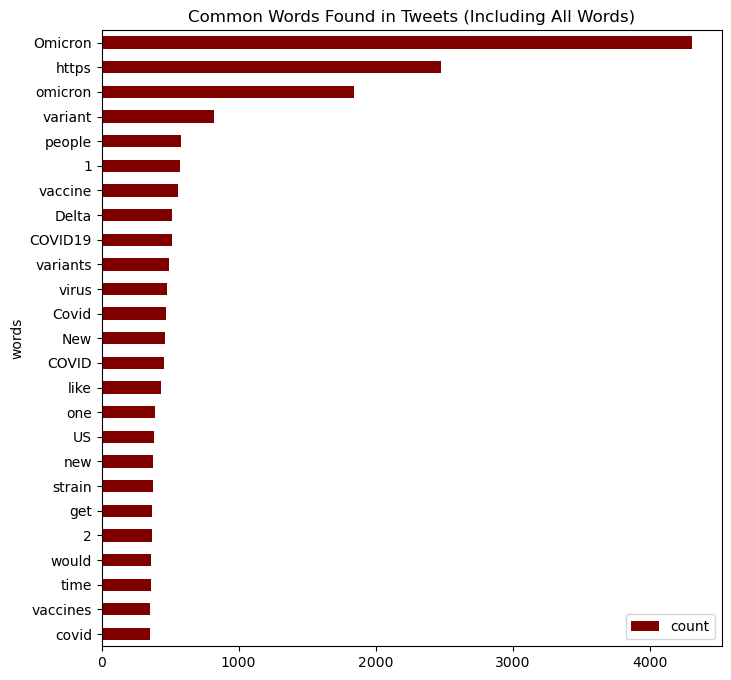

In [39]:

fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets[:25].sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color='maroon')
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

Using sentiment.polarity_score function, Find the polarity score of all the tweets and categorize them as Positive, Negative or Neutral.

In [40]:
PNN = data['polarity'].apply(lambda x: "Positive" if x>=0.05 else ("Negative" if x<= -0.05 else "Neutral"))
new_review = data['final_review']
new_review = new_review.tolist()
PNN = PNN.tolist()

dict = {'text':new_review, 'polarity':PNN}
pnn = pd.DataFrame(dict)
pnn.head()

,text,polarity
0,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,Positive
1,Im confused https,Negative
2,Long COVID less likely Omicron original virus Swiss LabPulse https,Neutral
3,finding dont tally high numbers see bulletins research still reports preOmicron infections need wait broader set studies Article covering report https,Positive
4,conference abstract European Congress Clinical Microbiology Infectious Diseases suggested Omicron infection causes much less LongCovid wildtype SARSCoV2 Expert comments including 10 https,Negative


In [41]:

data['PN'] = data['polarity'].apply(lambda x: "Positive" if x>=0 else "Negative")

In [42]:
data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,0.068182,0.277273,"[6, big, questions, new, Omicrontargeting, boosters, Boosting, Target, targeting, boost, https]",Positive
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,-0.400000,0.700000,"[Im, confused, https]",Negative


In [47]:
lb = LabelBinarizer()
data['label'] = lb.fit_transform(data['PN'])

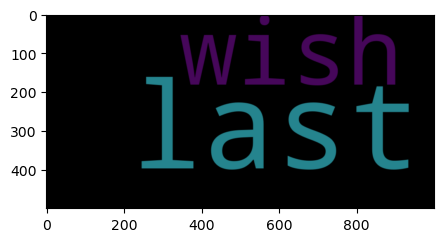

In [48]:
plt.figure(figsize=(5,5))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show()

In [49]:
data.head(2)

,tweets,retweet_count,review,stem_review,lemmatize_review,final_review,polarity,subjectivity,tokenize,PN,label
0,6 big questions about new Omicron-targeting boosters ... #Boosting #Target #targeting #boost https://t.co/9TWMuUXxJn,0,6 big questions about new Omicrontargeting boosters Boosting Target targeting boost https,6 big question about new omicrontarget booster boost target target boost http,6 big question about new Omicrontargeting booster Boosting Target targeting boost http,6 big questions new Omicrontargeting boosters Boosting Target targeting boost https,0.068182,0.277273,"[6, big, questions, new, Omicrontargeting, boosters, Boosting, Target, targeting, boost, https]",Positive,1
1,I'm confused https://t.co/NyfgdYUYAT,0,Im confused https,im confus http,Im confused http,Im confused https,-0.400000,0.700000,"[Im, confused, https]",Negative,0


In [50]:
data.shape

(6998, 11)

In [52]:
train = data.label[:5000]
test = data.label[5001:]

<b> Model Building and Evaluation </b>

<b> Logistic Regression </b>

In [53]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [54]:
lr_bow_predict = lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict = lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [55]:
print(lr_bow_predict.shape)
print(lr_tfidf_predict.shape)

(1997,)
(1997,)


In [56]:
cv_test_reviews[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
text = data['tweets'][5001:].tolist()

In [58]:
len(text)

1997

In [59]:
dict = {'text':text,'test':test, 'bow':lr_bow_predict, 'tfidf': lr_tfidf_predict}
df1 = pd.DataFrame(dict)

In [60]:
df1.head()

,text,test,bow,tfidf
5001,"Monovalent COVID booster protects well against Omicron, but it wanes over 6 months\n\nThe #COVID19 booster was 74% effective against #Omicron infection compared with the primary vaccine series for...",1,1,1
5002,"@KDog0129 @7inverse @stkirsch Vaccine helped at the start not so much now as Omicron is pretty weak but elderly should def get vaccinated , I think they have a better chance fighting Covid with va...",1,1,1
5003,Bivalent Boosters Protect Against New COVID-19 Variants\n\nhttps://t.co/9mHFBy6bhh\n\n@IDSE_Online #FAP_ICSCC,1,1,1
5004,Nothing https://t.co/dIXNfj4nmx,1,1,1
5005,@drvictoriafox I was in zero covid Taiwan prior to the arrival of Omicron where they finally realised all the restrictions were killing them both financially and socially.\n\nThey continued to mas...,1,1,1


In [61]:
df1[df1['test']!=df1['bow']]

,text,test,bow,tfidf
5006,Tough crowd https://t.co/Qd3qkXn1nQ,0,1,1
5013,The cost of living crises is just a name they made up just like Omicron was an anagram fir moronic the war in Ukraine and lack if gas should not mean they suffer with high extortionate prices when...,0,1,1
5016,@the_rock040404 @tradsperger No. I had it during Omicron. Not a bad case. I had one day of really achy joints and a terrible headache that I thought was a hormonal migraine. When I still felt awf...,0,1,1
5028,"@Pianokit @WaitingForPerot @1BJDJ Oh yes ,it mutated .we had ,delta ,omicron,and the kraken! 🐉 😂.oh and don't forget monkey 🐵 pox.But it was dropped because it was racist 😆",0,1,1
5031,@BBCNewsnight Absolutely! Masks are working so well in stringently masked Asian countries that recently re-opened to Omicron. Their populations will be infected to saturation in under a year - mo...,0,1,1
...,...,...,...,...
6980,@bucs601 @UoKnowsBest @DC_Draino The unvaxxed got very sick and or died? Maybe get off MSM and actually research. My unvaxxed dtr had Delta and was barely sick and still alive. I got Omicron and d...,0,1,1
6989,@MarshaManley @catturd2 No. When Omicron proved less deadly is when free thinkers started rejecting the official narrative. You hated us for this and ostracized and fired us but we were right.,0,1,1
6990,@thebobbyaxlrod @justin_hart @IanCopeland5 Same. Omicron was a game changer. Turns it into a minor throat cold for most.,0,1,1
6993,@Cycl_Conscience @BallouxFrancois Your argument is flawed. Masks work. We do know that. But they are no silver bullet to avoid every infection. There are times where people lift their masks and Om...,0,1,1


In [62]:
lr_bow_score = accuracy_score(test,lr_bow_predict)
print(lr_bow_score)
lr_tfidf_score = accuracy_score(test,lr_tfidf_predict)
print(lr_tfidf_score)

0.7966950425638458
0.7751627441161743


In [63]:
lr_bow_report=classification_report(test,lr_bow_predict,target_names=['Negative','Positive'])
print(lr_bow_report)
lr_tfidf_report = classification_report(test,lr_tfidf_predict,target_names=['Negative','Positive'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Negative       0.91      0.11      0.19       449
    Positive       0.79      1.00      0.88      1548

    accuracy                           0.80      1997
   macro avg       0.85      0.55      0.54      1997
weighted avg       0.82      0.80      0.73      1997

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       449
    Positive       0.78      1.00      0.87      1548

    accuracy                           0.78      1997
   macro avg       0.39      0.50      0.44      1997
weighted avg       0.60      0.78      0.68      1997



In [64]:
cm_bow = confusion_matrix(test,lr_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,lr_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[  48  401]
 [   5 1543]]
[[   0  449]
 [   0 1548]]


<b> Support Vector Machines </b>

In [65]:
lr = LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow = lr.fit(cv_train_reviews,train) #From Bag of Words
print(lr_bow)

lr_tfidf = lr.fit(tv_train_reviews,train) #TFIDF 
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [66]:
from sklearn import svm
svm = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
svm_bow = svm.fit(cv_train_reviews,train)
print(svm_bow)
svm_tfidf = svm.fit(tv_train_reviews,train)
print(svm_tfidf)

SVC(kernel='linear', random_state=0)
SVC(kernel='linear', random_state=0)


In [67]:
svm_bow_predict = svm.predict(cv_test_reviews)
print(svm_bow_predict)
svm_tfidf_predict = svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [68]:
svm_bow_score = accuracy_score(test,svm_bow_predict)
print(svm_bow_score)
svm_tfidf_score = accuracy_score(test,svm_tfidf_predict)
print(svm_tfidf_score)

0.7936905358037055
0.7921882824236355


In [69]:
svm_bow_report = classification_report(test,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
svm_tfidf_report = classification_report(test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.73      0.13      0.22       449
    Negative       0.80      0.99      0.88      1548

    accuracy                           0.79      1997
   macro avg       0.77      0.56      0.55      1997
weighted avg       0.78      0.79      0.73      1997

              precision    recall  f1-score   support

    Positive       0.93      0.08      0.15       449
    Negative       0.79      1.00      0.88      1548

    accuracy                           0.79      1997
   macro avg       0.86      0.54      0.52      1997
weighted avg       0.82      0.79      0.72      1997



In [70]:
cm_bow = confusion_matrix(test,svm_bow_predict,labels=[1,0])
print(cm_bow)
cm_tfidf = confusion_matrix(test,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[1527   21]
 [ 391   58]]
[[1545    3]
 [ 412   37]]


<b> KNN </b>

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier ()

In [72]:
knn_bow = knn.fit(cv_train_reviews,train)
print(knn_bow)
knn_tfidf = knn.fit(tv_train_reviews,train)
print(knn_tfidf)

KNeighborsClassifier()
KNeighborsClassifier()


In [73]:
knn_bow_predict = knn.predict(cv_test_reviews)
print(knn_bow_predict)
knn_tfidf_predict = knn.predict(tv_test_reviews)
print(knn_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [74]:
knn_bow_score = accuracy_score(test,knn_bow_predict)
print(knn_bow_score)
knn_tfidf_score = accuracy_score(test,knn_tfidf_predict)
print(knn_tfidf_score)

0.7706559839759639
0.7886830245368052


In [75]:
knn_bow_report = classification_report(test,knn_bow_predict,target_names=['Positive','Negative'])
print(knn_bow_report)
knn_tfidf_report = classification_report(test,knn_tfidf_predict,target_names=['Positive','Negative'])
print(knn_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.40      0.04      0.08       449
    Negative       0.78      0.98      0.87      1548

    accuracy                           0.77      1997
   macro avg       0.59      0.51      0.47      1997
weighted avg       0.70      0.77      0.69      1997

              precision    recall  f1-score   support

    Positive       0.83      0.08      0.14       449
    Negative       0.79      1.00      0.88      1548

    accuracy                           0.79      1997
   macro avg       0.81      0.54      0.51      1997
weighted avg       0.80      0.79      0.71      1997



In [76]:
cm_bow = confusion_matrix(test,knn_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,knn_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[  19  430]
 [  28 1520]]
[[  34  415]
 [   7 1541]]


<b> Decision Tree </b>

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'entropy',max_depth=3)

In [78]:
dtc_bow = dtc.fit(cv_train_reviews,train)
print(dtc_bow)
dtc_tfidf = dtc.fit(tv_train_reviews,train)
print(dtc_tfidf)

DecisionTreeClassifier(criterion='entropy', max_depth=3)
DecisionTreeClassifier(criterion='entropy', max_depth=3)


In [79]:
dtc_bow_predict = dtc.predict(cv_test_reviews)
print(dtc_bow_predict)
dtc_tfidf_predict = dtc.predict(tv_test_reviews)
print(dtc_tfidf_predict)

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


In [80]:
dtc_bow_score = accuracy_score(test,dtc_bow_predict)
print(dtc_bow_score)
dtc_tfidf_score = accuracy_score(test,dtc_tfidf_predict)
print(dtc_tfidf_score)

0.7751627441161743
0.7751627441161743


In [81]:
dtc_bow_report = classification_report(test,dtc_bow_predict,target_names=['Positive','Negative'])
print(dtc_bow_report)
dtc_tfidf_report = classification_report(test,dtc_tfidf_predict,target_names=['Positive','Negative'])
print(dtc_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       449
    Negative       0.78      1.00      0.87      1548

    accuracy                           0.78      1997
   macro avg       0.39      0.50      0.44      1997
weighted avg       0.60      0.78      0.68      1997

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00       449
    Negative       0.78      1.00      0.87      1548

    accuracy                           0.78      1997
   macro avg       0.39      0.50      0.44      1997
weighted avg       0.60      0.78      0.68      1997



In [100]:
cm_bow = confusion_matrix(test,dtc_bow_predict,labels=[0,1])
print(cm_bow)
cm_tfidf = confusion_matrix(test,dtc_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[   0  449]
 [   1 1547]]
[[   0  449]
 [   1 1547]]
